## Predicting Apartment Rental Prices with Multiple Linear Regression

In this notebook, we employ multiple linear regression to predict apartment rental prices. The dataset has been processed and cleaned to ensure accuracy in our analysis.

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Data Preparation

We split the processed and cleaned data into training and testing datasets. The training dataset will be used to train our model, while the testing dataset will be used to evaluate its performance.


In [7]:
data = pd.read_excel('Excel_files\\Processed data combined.xlsx')
x = data.drop(['price', 'month'], axis=1)
y = data.price
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=6)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(618, 20)
(206, 20)
(618,)
(206,)


### Model Training

We utilize the training dataset to determine the model's slope and intercept. These parameters are essential for making predictions based on the given features. By fitting the model to the training data, we aim to capture the underlying relationships between the features and the rental prices. We also visualize actual versus predicted prices.

## Assumptions of Linear Regression
### Linear relationship 
The first assumption is that the relationship between the outcome variable and predictor is linear. We can check this before fitting the regression by simply looking at a scatter plot of the two variables. Additionally, linear relationship can be checked with correlation matrix as we did in visualization file.


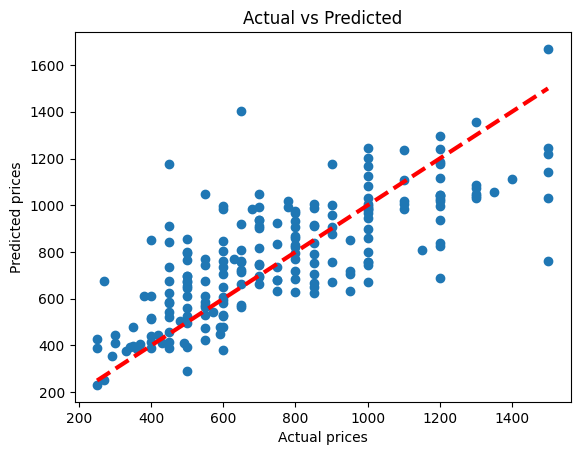

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

plt.scatter(y_test, y_predict)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=3)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual vs Predicted')
plt.show()

### Normality Assumption
The normality assumption states that the residuals should be normally distributed. This assumption is made because, statistically, the residuals of any independent dataset will approach a normal distribution when the dataset is large enough.
To check the normality assumption, we can inspect a histogram of the residuals and make sure that the distribution looks approximately normal (no skew or multiple “humps”)

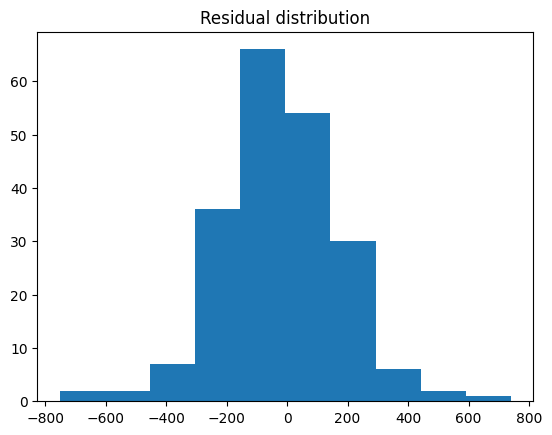

In [9]:

residuals = y_test - y_predict
plt.hist(residuals)
plt.title("Residual distribution")
plt.show()

These residuals appear normally distributed, leading us to conclude that the normality assumption is satisfied.
### Homoscedasticity Assumption
Homoscedasticity is an assumption that the residuals have equal variation across all values of the predictor (independent) variable. When homoscedasticity is not met, this is called heteroscedasticity, meaning that the variation in the size of the error term differs across the independent variable.

Since a linear regression seeks to minimize residuals and gives equal weight to all observations, heteroscedasticity can lead to bias in the results.

A common way to check this is by plotting the residuals against the predicted values.

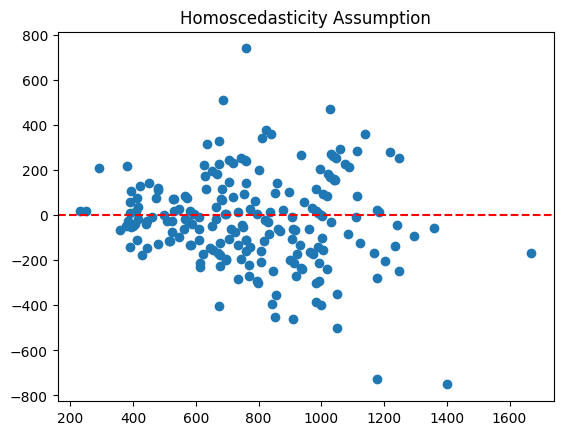

In [10]:
#Homoscedasticity Assumption
plt.scatter(y_predict, residuals)
plt.title("Homoscedasticity Assumption")
plt.axhline(y=0, color='r', linestyle="dashed")
plt.show()

## Model Evaluation and Parameter Analysis

After training the model, we evaluate its performance using the testing dataset to assess accuracy and generalization ability. This evaluation is crucial for understanding how well the model performs on unseen data, providing insights into its reliability in real-world scenarios.

Additionally, we analyze the slope and intercept values obtained from fitting the model to the training set. These parameters represent the best-fit line for the given training data and are essential for making predictions based on the model.

By examining both model performance and parameter values, we gain a comprehensive understanding of the predictive capabilities and characteristics of our multiple linear regression model.

In [11]:
print(f"Model accuracy: {model.score(x_test, y_test)}")
print(f"Intercept value is: {model.intercept_}")
print(f"Slope value is: {model.coef_}")

Model accuracy: 0.5485516423227094
Intercept value is: 253.6427264727214
Slope value is: [   6.78317532   50.72355999    7.16547081   14.95073104  -33.32284061
  -16.55374945  -66.45235436 -104.40863127  205.78684464   15.17009409
  -81.75230844  281.24827074  188.62404564 -115.68774574   79.70380975
 -130.74046621  -85.1118148  -151.45388502  -42.35031372   42.35031372]
